In [18]:
%%capture
import rasterio
import rasterio.plot
import os
import cv2
import numpy as np
from numpy import array as array
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
import torch

In [19]:
image_folder_path = 'images'
csv_path = 'burundi_combined_corrected_mpi.csv'
folder_path = ''


In [20]:
%ls 'c:/Users/finnl/Downloads/images'


Invalid switch - "Users".


In [21]:
df = pd.read_csv(csv_path)
df

,region,mpi,pop_in_mpi,deprivation_intensity,vulnerable_to_poverty,in_severe_poverty,pop_share,pop_size,num_mpi_poor,nutrition,child_mortality,years_of_schooling,school_attendance,cooking_fuel,sanitation,drinking_water,electricity,housing,assets
0,Bubanza,0.441545,78.610427,56.168817,14.757839,52.467071,4.856709,560.006531,440.223511,54.101958,8.004371,47.836350,24.350763,78.539326,53.611284,46.960313,75.976788,74.955655,61.858153
1,Bujumbura Mairie,0.113665,24.268078,46.837129,29.740326,9.638728,6.157891,710.040344,172.313141,17.023920,3.965573,9.609970,4.531294,23.903609,19.446212,7.919354,17.367017,14.082497,16.485511
2,Bujumbura Rural,0.342855,69.099075,49.617858,21.583638,33.701467,6.054747,698.147278,482.413300,48.531596,4.015276,27.136601,17.487452,69.099075,44.769437,32.530442,67.056448,61.701016,50.469453
3,Bururi,0.289831,60.369348,48.009568,26.459966,22.787346,3.311622,381.849091,230.519806,39.369021,4.512092,27.185472,11.951831,60.161314,20.536824,33.150180,59.569702,53.172322,46.049549
4,Cankuzo,0.461232,81.761344,56.411969,12.935615,55.393561,3.007225,346.750366,283.507751,55.957036,8.958656,51.803529,30.919311,81.756218,44.583448,53.147525,81.237876,77.318169,49.258467
5,Cibitoke,0.427891,77.493611,55.216351,16.160180,49.217703,5.870611,676.915283,524.566101,52.551568,9.598220,44.136369,28.986809,77.478521,42.519167,40.225444,73.893649,72.302205,57.966705
6,Gitega,0.393233,75.978417,51.755852,17.247683,41.747306,7.805024,899.964356,683.778687,48.005642,9.741094,36.237126,16.639653,75.615586,51.841202,46.729605,75.049950,72.775363,53.936729
7,Karusi,0.464934,82.700566,56.218997,14.002573,54.720902,5.217267,601.580933,497.510834,58.560211,6.655589,63.779479,29.180773,82.666617,15.499372,37.680068,82.270261,81.323308,62.913930
8,Kayanza,0.417104,77.978345,53.489663,15.177792,45.679507,7.163336,825.973938,644.080810,52.634181,5.960662,41.607384,25.103849,77.794307,52.314923,36.958913,76.391837,74.733658,56.674502
9,Kirundo,0.542976,90.102182,60.262299,8.694848,68.014777,7.186064,828.594666,746.581848,53.716563,14.037048,63.276117,40.195345,90.054350,76.916449,57.190111,89.579403,86.299782,63.642319


In [22]:
# cleaning dataset
df_numeric = df.loc[ : , df.columns != 'region']

df = df.applymap(lambda s : str(s).replace(",", ""))
df.loc[ : , df.columns != 'region'] =  df.loc[ : , df.columns != 'region'].applymap(lambda s : float(s))

print(len(df))

regions = df["region"]

# df = df.iloc[:2]

df.head()

18


C:\Users\finnl\AppData\Local\Temp\ipykernel_54492\3148867457.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda s : str(s).replace(",", ""))
C:\Users\finnl\AppData\Local\Temp\ipykernel_54492\3148867457.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.loc[ : , df.columns != 'region'] =  df.loc[ : , df.columns != 'region'].applymap(lambda s : float(s))


,region,mpi,pop_in_mpi,deprivation_intensity,vulnerable_to_poverty,in_severe_poverty,pop_share,pop_size,num_mpi_poor,nutrition,child_mortality,years_of_schooling,school_attendance,cooking_fuel,sanitation,drinking_water,electricity,housing,assets
0,Bubanza,0.441545,78.610427,56.168817,14.757839,52.467071,4.856709,560.006531,440.223511,54.101958,8.004371,47.83635,24.350763,78.539326,53.611284,46.960313,75.976788,74.955655,61.858153
1,Bujumbura Mairie,0.113665,24.268078,46.837129,29.740326,9.638728,6.157891,710.040344,172.313141,17.02392,3.965573,9.60997,4.531294,23.903609,19.446212,7.919354,17.367017,14.082497,16.485511
2,Bujumbura Rural,0.342855,69.099075,49.617858,21.583638,33.701467,6.054747,698.147278,482.4133,48.531596,4.015276,27.136601,17.487452,69.099075,44.769437,32.530442,67.056448,61.701016,50.469453
3,Bururi,0.289831,60.369348,48.009568,26.459966,22.787346,3.311622,381.849091,230.519806,39.369021,4.512092,27.185472,11.951831,60.161314,20.536824,33.15018,59.569702,53.172322,46.049549
4,Cankuzo,0.461232,81.761344,56.411969,12.935615,55.393561,3.007225,346.750366,283.507751,55.957036,8.958656,51.803529,30.919311,81.756218,44.583448,53.147525,81.237876,77.318169,49.258467


In [23]:
def sample_images(rgb_image, num_sampled_images, image_length):
    len1, len2 = rgb_image.shape[0], rgb_image.shape[1]
    ys, xs = np.arange((len1 - image_length)//image_length), np.arange((len2 - image_length)//image_length)
    sampled_upper_left_corner_indices = set()
    while len(sampled_upper_left_corner_indices) < num_sampled_images:
        y = np.random.choice(ys) * image_length # corresponding to axis 0
        x = np.random.choice(xs) * image_length # corresponding to axis 1
        if (y, x) in sampled_upper_left_corner_indices:
            continue
        if np.isnan(rgb_image[y:y+image_length, x:x+image_length]).any():
            continue
        sampled_upper_left_corner_indices.add((y, x))
    
    samples = np.zeros((num_sampled_images, image_length, image_length))

    for i, sample in enumerate(sampled_upper_left_corner_indices):
        samples[i] = rgb_image[y:y+image_length, x:x+image_length].copy()
    
    return samples

In [24]:
image_length = 40 # each sampled image is image_length by image_length
num_images_per_region = 24

In [25]:
from torch.nn import Conv2d, MaxPool2d, Flatten, Linear
from torch.nn.functional import relu

from pytorch_model_summary import summary

from torch.utils.data import DataLoader, TensorDataset

class CNNRegressor(torch.nn.Module):
  def __init__(self):
    
    super(CNNRegressor, self).__init__()

    # define convolutional layers
    self.conv_layer1 = Conv2d(1, 8, kernel_size=4, stride=1)
    self.maxpool1 = MaxPool2d(kernel_size=4, stride=2)
    self.conv_layer2 = Conv2d(8, 16, kernel_size=2, stride=2)
    self.maxpool2 = MaxPool2d(kernel_size=4, stride=2)
    self.flatten_layer = Flatten()
    self.linear_layer = Linear(5184, 10)
    self.output_layer = Linear(10, 1)
    self.double()

  # define the method to feed the inputs to the model
  def forward(self, input):
    input = input.double()
    output = relu(self.conv_layer1(input))
    output = relu(self.conv_layer2(output))
    output = self.flatten_layer(output)
    output = relu(self.linear_layer(output))
    output = self.output_layer(output)
    return output

print(summary(CNNRegressor(), torch.zeros((1, 1, image_length, image_length)), show_input=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
          Conv2d-1      [1, 1, 40, 40]             136             136
          Conv2d-2      [1, 8, 37, 37]             528             528
         Flatten-3     [1, 16, 18, 18]               0               0
          Linear-4           [1, 5184]          51,850          51,850
          Linear-5             [1, 10]              11              11
Total params: 52,525
Trainable params: 52,525
Non-trainable params: 0
-----------------------------------------------------------------------


In [26]:
class LinearRegressor(torch.nn.Module):
  def __init__(self):
    
    super(LinearRegressor, self).__init__()
    self.output_layer = Linear(1600, 1)
    self.flatten_layer = Flatten()
    self.double()

  # define the method to feed the inputs to the model
  def forward(self, input):
    input = input.double()
    output = self.flatten_layer(input)
    output = self.output_layer(output)
    return output

print(summary(LinearRegressor(), torch.zeros((1, 1, image_length, image_length)), show_input=True))

-----------------------------------------------------------------------
      Layer (type)         Input Shape         Param #     Tr. Param #
         Flatten-1      [1, 1, 40, 40]               0               0
          Linear-2           [1, 1600]           1,601           1,601
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
-----------------------------------------------------------------------


In [27]:
%%capture
from torch.optim import Adam
from torch.nn import MSELoss

from ignite.contrib.metrics.regression.r2_score import R2Score

In [28]:
def model_loss(model, dataset, train = False, optimizer = None):
  loss_fn = MSELoss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  all_outputs = []
  all_predictions = []

  for input, output in iter(dataset):
    # get predictions of the model for training set

    input = input.float()
    predictions = model(input)

    # calculate loss of the model
    loss = loss_fn(predictions, output)

    # compute the R2 score
    score_metric.update([predictions, output])
    try:
        score = score_metric.compute()
    except:
        score = 0

    if(train):
      # clear the errors
      optimizer.zero_grad()

      # compute the gradients for optimizer
      loss.backward()

      # use optimizer in order to update parameters
      # of the model based on gradients
      optimizer.step()

    # store the loss and update values
    avg_loss += loss.item()
    avg_score += score
    count += 1

    if not train:
      all_outputs.append(output.detach().numpy())
      all_predictions.append(predictions.detach().numpy())

  if train:
    return avg_loss/count, avg_score/count
  else:
    return avg_loss/count, avg_score/count, np.array(all_predictions).squeeze(), np.array(all_outputs).squeeze()

Shape of X: (432, 40, 40)
432 Images with 40 x 40 Pixels


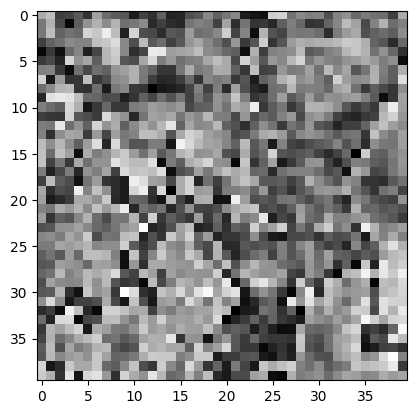

In [29]:
# couple of tests with the X_Burundi.npy file
import matplotlib.pyplot as plt
numpy_file_location = os.path.join(folder_path, "X_Burundi.npy")
X = np.load(numpy_file_location)

# show shape and size of the array
print("Shape of X:", X.shape)
print(X.shape[0], 'Images with', X.shape[1], 'x', X.shape[2], 'Pixels')
# Show the first 5 image arrays
# print(X[:5])

# view the first image
plt.imshow(X[100], cmap='gray') # gray since we have only one channel
plt.show()


These are randomly selected 40x40 pixel images from the Burundi image dataset. There are 24 images per region (24x18 = 432 images total).
While these images may not look like much, they are enough to train a CNN model to predict the MPI of a region (as you see further below).
The images are randomly sampled from the 40x40 pixel images of each region, so they are not necessarily representative of the region.
However, due to that randomness, the model is able to learn the general features of the region, and predict the MPI of a region based on those features, even though they may not represent the region perfectly.
40 x 40 pixels is equivalent to 400 m x 400 m, (1 pixel = 10 m x 10 m) which is a reasonable size to represent a region.
We have a total of 432 images, each of which is 40x40 pixels, and each pixel represents 10 m x 10 m, so the total area represented by the images is 69.12 km^2 (432 x 40 x 40 x 10 x 10).
Compared to the total area of Burundi (27,834 km^2), this is a small area of just 0.2485% of Burundi's total area.
Given this fact, it is especially impressive that the model is able to predict the MPI so well! (see below).

In [30]:
labels_of_interest = ["mpi", "pop_in_mpi", "deprivation_intensity"] + ["nutrition", "child_mortality", "years_of_schooling", "school_attendance", "cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]

numpy_file_location = os.path.join(folder_path, "X_Burundi.npy")
cnn_results_files_location = os.path.join(folder_path, "results_cnn.npy")
lr_results_files_location = os.path.join(folder_path, "results_lr.npy")

with open(numpy_file_location, "rb") as f:
    X = np.load(f)
    loaded = True

print(X.shape)

for model_name, model in zip(["cnn", "lr"], [CNNRegressor(), LinearRegressor()]):
# for model_name, model in zip(["lr"], [LinearRegressor()]):
    train_predictions = {label_of_interest: [] for label_of_interest in labels_of_interest}
    test_predictions = {label_of_interest: [] for label_of_interest in labels_of_interest}
    train_responses = {label_of_interest: [] for label_of_interest in labels_of_interest}
    test_responses = {label_of_interest: [] for label_of_interest in labels_of_interest}
    train_mse = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    test_mse = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    train_r2 = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    test_r2 = {label_of_interest: 0 for label_of_interest in labels_of_interest}
    results_predicted = {label_of_interest: [] for label_of_interest in labels_of_interest}
    results_actual = {label_of_interest: [] for label_of_interest in labels_of_interest}
    all_preds_labels = {label_of_interest: [] for label_of_interest in labels_of_interest}
    all_outputs_labels = {label_of_interest: [] for label_of_interest in labels_of_interest}

    for label_of_interest in labels_of_interest:

        regions = list(df["region"])
        region_indices = {region: i for i, region in enumerate(regions)}
        # print(region_indices)
        num_regions = len(regions)

        labels = {region: 0 for region in regions}
        for region in regions:
            labels[region] = df[df["region"] == region][label_of_interest]

        # X = np.zeros((num_regions * num_images_per_region, image_length, image_length))
        y = np.zeros(num_regions * num_images_per_region)

        for i, region in enumerate(regions):
            y[num_images_per_region * i : num_images_per_region * (i+1)] = labels[region]

        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=288)

        X_train = X_train[:, None, :, :]
        X_test = X_test[:, None, :, :]

        # convert the values of training set to the numpy array
        try:
            X_train_np = X_train.to_numpy()
            y_train_np = y_train.to_numpy()
        except:
            X_train_np = X_train
            y_train_np = y_train

        # convert the values of testing set to the numpy array
        try:
            X_test_np = X_test.to_numpy()
            y_test_np = y_test.to_numpy()
        except:
            X_test_np = X_test
            y_test_np = y_test

        if torch.cuda.is_available():
            model.cuda() # if GPU is available

        epochs = 100
        optimizer = Adam(model.parameters(), lr = 2e-5)

        if torch.cuda.is_available():
            train_inputs = torch.from_numpy(X_train_np).cuda().double()
            train_outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1)).cuda().double()
            test_inputs = torch.from_numpy(X_test_np).cuda().double()
            test_outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1)).cuda().double()
        else:
            train_inputs = torch.from_numpy(X_train_np)
            train_outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0],1))
            test_inputs = torch.from_numpy(X_test_np)
            test_outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0],1))

        tensor = TensorDataset(train_inputs, train_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = True, drop_last = False)

        for epoch in range(epochs):
            avg_loss, avg_r2_score = model_loss(model, loader, train = True, optimizer = optimizer)
            if epoch % 20 == 0:
                print("Epoch " + str(epoch + 1) + ":\n\tLoss = " + str(avg_loss) + "\n\tR^2 Score = " + str(avg_r2_score))

        torch.save(model,  'model-{}.pt'.format(label_of_interest))

        tensor = TensorDataset(train_inputs, train_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = False, drop_last = True)

        train_avg_loss, train_avg_r2_score, train_preds, train_outputs = model_loss(model, loader, train=False)

        train_mse[label_of_interest] = train_avg_loss
        train_r2[label_of_interest] = train_avg_r2_score
        train_responses[label_of_interest] = train_outputs
        train_predictions[label_of_interest] = train_preds

        tensor = TensorDataset(test_inputs, test_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = False, drop_last = True)

        # output of the performance of the model
        test_avg_loss, test_avg_r2_score, test_preds, test_outputs = model_loss(model, loader, train=False)

        test_mse[label_of_interest] = test_avg_loss
        test_r2[label_of_interest] = test_avg_r2_score
        test_responses[label_of_interest] = test_outputs
        test_predictions[label_of_interest] = test_preds

        print("The model's L2 loss is: " + str(avg_loss))
        print("The model's R^2 score is: " + str(avg_r2_score))

        # all predictions
        X_all = X.copy()[:, None, :, :]
        all_inputs = torch.from_numpy(X_all)
        all_outputs = torch.from_numpy(y.reshape(y.shape[0],1))

        tensor = TensorDataset(all_inputs, all_outputs)
        loader = DataLoader(tensor, batch_size=1, shuffle = False, drop_last = True)
        all_avg_loss, all_avg_r2_score, all_preds, all_outputs = model_loss(model, loader, train=False)
        
        result_predicted = {region: 0 for region in regions}
        result_actual = {region: 0 for region in regions}

        for i, region in enumerate(regions):
            predicted = all_preds[24*i:24*(i+1)].mean()
            actual = y[24*i:24*(i+1)].mean()
            result_predicted[region] = predicted
            result_actual[region] = actual

        results_predicted[label_of_interest] = result_predicted
        results_actual[label_of_interest] = result_actual
        all_preds_labels[label_of_interest] = all_preds
        all_outputs_labels[label_of_interest] = all_outputs

    if model_name == "cnn":
        with open(cnn_results_files_location, "wb") as f:
            np.save(f, train_mse)
            np.save(f, train_r2)
            np.save(f, train_responses)
            np.save(f, train_predictions)
            np.save(f, test_mse)
            np.save(f, test_r2)
            np.save(f, test_responses)
            np.save(f, test_predictions)
            np.save(f, results_actual)
            np.save(f, results_predicted)
            np.save(f, all_preds_labels)
            np.save(f, all_outputs_labels)
    elif model_name == "lr":
        with open(lr_results_files_location, "wb") as f:
            np.save(f, train_mse)
            np.save(f, train_r2)
            np.save(f, train_responses)
            np.save(f, train_predictions)
            np.save(f, test_mse)
            np.save(f, test_r2)
            np.save(f, test_responses)
            np.save(f, test_predictions)
            np.save(f, results_actual)
            np.save(f, results_predicted)
            np.save(f, all_preds_labels)
            np.save(f, all_outputs_labels)
    else:
        print("model name not found!!")

(432, 40, 40)


Epoch 1:
	Loss = 0.19379623048020397
	R^2 Score = -25537.030135534304
Epoch 21:
	Loss = 0.00124152148974025
	R^2 Score = 641.7548912515527
Epoch 41:
	Loss = 0.0005966799924382061
	R^2 Score = 799.6556247702048
Epoch 61:
	Loss = 0.0007382933334175043
	R^2 Score = -2368.713270649272
Epoch 81:
	Loss = 0.000406413593708649
	R^2 Score = -1200.1621174416996
The model's L2 loss is: 0.0007790594763901923
The model's R^2 score is: 157.52355700928868
Epoch 1:
	Loss = 4520.334761717048
	R^2 Score = -49646.140717870614
Epoch 21:
	Loss = 223.20360957090625
	R^2 Score = 1259.4969713537312
Epoch 41:
	Loss = 197.39675444898614
	R^2 Score = -4537.841191406642
Epoch 61:
	Loss = 170.24603579227923
	R^2 Score = 375.694593413131
Epoch 81:
	Loss = 145.5424279355237
	R^2 Score = -188.54918034564247
The model's L2 loss is: 119.43691574047268
The model's R^2 score is: 26.988441512426117
Epoch 1:
	Loss = 69.31746477624705
	R^2 Score = -26945.377106156044
Epoch 21:
	Loss = 10.400867691504276
	R^2 Score = -62.587

In [31]:
labels_of_interest = ["mpi", "pop_in_mpi", "deprivation_intensity"] + ["nutrition", "child_mortality", "years_of_schooling", "school_attendance", "cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]

In [32]:
from IPython.display import display

def mse(predicted, actual):
    return np.mean((predicted - actual)**2)

for model_name in ["lr", "cnn"]:
    if model_name == "lr":
        lr_results_files_location = os.path.join(folder_path, "results_lr.npy")
        with open(lr_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)
    elif model_name == "cnn":
        cnn_results_files_location = os.path.join(folder_path, "results_cnn.npy")
        with open(cnn_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)

    print(f"{model_name}")
    mpi_vals = np.array(list(results_actual[()]["mpi"].values()))

    print("direct_method")
    direct_method = np.array(list(results_predicted[()]["mpi"].values()))
    print(mse(direct_method, mpi_vals))
    display(direct_method)

    print("factor method, AF")
    factor_average_first = np.array(list(results_predicted[()]["pop_in_mpi"].values())) * np.array(list(results_predicted[()]["deprivation_intensity"].values())) / 10000
    print(mse(factor_average_first, mpi_vals))
    display(factor_average_first)

    print("factor method, AL")
    average_last_predictions = all_preds_labels[()]["pop_in_mpi"] * all_preds_labels[()]["deprivation_intensity"] / 10000
    factor_average_last = np.zeros(18)
    for i in range(18):
        for j in range(24):
            factor_average_last[i] = np.mean(average_last_predictions[24*i:24*(i+1)])

    print(mse(factor_average_last, mpi_vals))
    display(factor_average_last)

    print("components method, AF")
    components_average_first = np.zeros(18)
    for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
        components_average_first += np.array(list(results_predicted[()][label].values()))/6
    for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
        components_average_first += np.array(list(results_predicted[()][label].values()))/18
    components_average_first/=100

    print(mse(components_average_first, mpi_vals))
    display(components_average_first)

    print("components method, AL")
    average_last_component_predictions = np.zeros(432) # zeros for 18*24
    for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
        average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/6
    for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
        average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/18
    average_last_component_predictions/=100

    components_average_last = np.zeros(18)
    for i in range(18):
        for j in range(24):
            components_average_last[i] = np.mean(average_last_component_predictions[24*i:24*(i+1)])

    print(mse(components_average_last, mpi_vals))
    display(components_average_last)

lr
direct_method
6.359940468873653


array([-1.60628715,  0.72474174,  1.72232344, -2.9497272 ,  0.41972338,
       -0.66221315, -2.49151319, -1.00581332,  1.42188672, -0.32654291,
       -4.72287121, -1.36422858, -5.35846252,  2.20853007, -0.56278095,
        3.60933394,  2.63771539,  1.03076064])

factor method, AF
0.0019479148535538303


array([0.40523362, 0.16965371, 0.36008309, 0.27869619, 0.44149097,
       0.38908503, 0.36800314, 0.42133948, 0.43527908, 0.49685681,
       0.33456254, 0.37537969, 0.422069  , 0.38014234, 0.42434333,
       0.43832689, 0.44014831, 0.45815983])

factor method, AL
0.0016598389748668538


array([0.44129458, 0.18342525, 0.37019366, 0.29280307, 0.45971013,
       0.39903815, 0.39946126, 0.44701372, 0.43790287, 0.51366244,
       0.34928496, 0.38342189, 0.46017808, 0.40570113, 0.4462041 ,
       0.45634007, 0.46703514, 0.47431783])

components method, AF
0.0014506140630707756


array([0.41617087, 0.18067521, 0.35883395, 0.2858026 , 0.44204717,
       0.40042213, 0.37824455, 0.43029958, 0.43200679, 0.50429814,
       0.34393734, 0.37655875, 0.44408316, 0.37909341, 0.43185031,
       0.4328281 , 0.43315918, 0.45293979])

components method, AL
0.0014506140630707745


array([0.41617087, 0.18067521, 0.35883395, 0.2858026 , 0.44204717,
       0.40042213, 0.37824455, 0.43029958, 0.43200679, 0.50429814,
       0.34393734, 0.37655875, 0.44408316, 0.37909341, 0.43185031,
       0.4328281 , 0.43315918, 0.45293979])

cnn
direct_method
0.0010654087128539214


array([0.42329612, 0.16685006, 0.37208361, 0.34532564, 0.44366944,
       0.41445484, 0.44445789, 0.42785289, 0.42184765, 0.53203659,
       0.40471957, 0.39825278, 0.51917381, 0.39607515, 0.43543648,
       0.39365649, 0.41182202, 0.44282523])

factor method, AF
0.0034503958298015107


array([0.43054526, 0.30150379, 0.37488527, 0.36127768, 0.44052994,
       0.4046966 , 0.40885992, 0.43518246, 0.42863496, 0.46748713,
       0.42208586, 0.38455935, 0.46035976, 0.37895014, 0.42382507,
       0.3977942 , 0.42643572, 0.43712357])

factor method, AL
0.003459512999245008


array([0.431386  , 0.30251726, 0.37509853, 0.36200424, 0.44125923,
       0.40864033, 0.4094723 , 0.43580126, 0.42880704, 0.46871655,
       0.42279445, 0.38492193, 0.46113465, 0.38101733, 0.42481388,
       0.39865526, 0.42687433, 0.43768865])

components method, AF
0.0005156274914042101


array([0.43530474, 0.14716095, 0.33845601, 0.32200228, 0.43987605,
       0.40480752, 0.40993841, 0.43820428, 0.41756345, 0.50585724,
       0.38792018, 0.36935712, 0.50417456, 0.35530626, 0.43155742,
       0.38547371, 0.40588179, 0.43441821])

components method, AL
0.0005156274914042092


array([0.43530474, 0.14716095, 0.33845601, 0.32200228, 0.43987605,
       0.40480752, 0.40993841, 0.43820428, 0.41756345, 0.50585724,
       0.38792018, 0.36935712, 0.50417456, 0.35530626, 0.43155742,
       0.38547371, 0.40588179, 0.43441821])

In [33]:
for model_name in ["lr", "cnn"]:
    if model_name == "lr":
        lr_results_files_location = os.path.join(folder_path, "results_lr.npy")
        with open(lr_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)
    elif model_name == "cnn":
        cnn_results_files_location = os.path.join(folder_path, "results_cnn.npy")
        with open(cnn_results_files_location, "rb") as f:
            train_mse = np.load(f, allow_pickle=True)
            train_r2 = np.load(f, allow_pickle=True)
            train_responses = np.load(f, allow_pickle=True)
            train_predictions = np.load(f, allow_pickle=True)
            test_mse = np.load(f, allow_pickle=True)
            test_r2 = np.load(f, allow_pickle=True)
            test_responses = np.load(f, allow_pickle=True)
            test_predictions = np.load(f, allow_pickle=True)
            results_actual = np.load(f, allow_pickle=True)
            results_predicted = np.load(f, allow_pickle=True)
            all_preds_labels = np.load(f, allow_pickle=True)
            all_outputs_labels = np.load(f, allow_pickle=True)

    print(model_name)
    for label in labels_of_interest:
        # print(label)
        print(test_mse[()][label])

lr
582.3674756372036
850.6825333118431
633.7033468454355
709.7845460461896
611.2415034520419
851.3707375214725
690.291326885428
873.3675951973091
1132.2058749632783
873.4301930638692
886.6374448696749
916.0558600753027
785.4910385994938
cnn
0.03299869501882542
182.19939614262418
33.56948621233359
96.90387092529384
13.483630444598603
225.62015316115298
109.69918022526643
214.38798590369493
585.5525026722273
223.48019973893912
251.37827865195652
268.3865911823053
143.47508852252182


In [34]:
average_last_predictions = all_preds_labels[()]["pop_in_mpi"] * all_preds_labels[()]["deprivation_intensity"] / 10000
factor_average_last = np.zeros(18)
for i in range(18):
    for j in range(24):
        factor_average_last[i] = np.mean(average_last_predictions[24*i:24*(i+1)])

print(np.mean((mpi_vals - factor_average_last)**2))

factor_average_last

0.003459512999245008


array([0.431386  , 0.30251726, 0.37509853, 0.36200424, 0.44125923,
       0.40864033, 0.4094723 , 0.43580126, 0.42880704, 0.46871655,
       0.42279445, 0.38492193, 0.46113465, 0.38101733, 0.42481388,
       0.39865526, 0.42687433, 0.43768865])

In [35]:
mpi_vals = np.array(list(results_predicted[()]["mpi"].values()))

np.mean((mpi_vals - np.array(list(results_actual[()]["mpi"].values())))**2)

np.array(list(results_actual[()]["mpi"].values()))

array([0.44154547, 0.11366471, 0.34285481, 0.28983064, 0.46123184,
       0.42789144, 0.39323277, 0.46493429, 0.41710354, 0.54297647,
       0.38366502, 0.36708866, 0.53273694, 0.33206791, 0.47091258,
       0.38389239, 0.40680927, 0.46224189])

In [36]:
factor_average_first = np.array(list(results_predicted[()]["pop_in_mpi"].values())) * np.array(list(results_predicted[()]["deprivation_intensity"].values())) / 10000

np.mean((mpi_vals - factor_average_first)**2)

0.0015958156795512302

In [37]:
components_average_first = np.zeros(18)
for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
    components_average_first += np.array(list(results_predicted[()][label].values()))/6
for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
    components_average_first += np.array(list(results_predicted[()][label].values()))/18
components_average_first/=100

np.mean((mpi_vals - components_average_first)**2)

0.00041715613221512504

In [38]:
average_last_component_predictions = np.zeros(432)  # changed from 444 to 432
for label in ["nutrition", "child_mortality", "years_of_schooling", "school_attendance"]:
    average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/6
for label in ["cooking_fuel", "sanitation", "drinking_water", "electricity", "housing", "assets"]:
    average_last_component_predictions += np.array(list(all_preds_labels[()][label]))/18
average_last_component_predictions/=100

components_average_last = np.zeros(18)
for i in range(18):
    for j in range(24):
        components_average_last[i] = np.mean(average_last_component_predictions[24*i:24*(i+1)])

np.mean((mpi_vals - components_average_last)**2)

0.0004171561322151261

In [39]:
all_outputs.shape

(432,)

In [40]:
np.mean((all_preds[()]["pop_in_mpi"] * test_responses[()]["deprivation_intensity"] / 10000 - test_responses[()]["mpi"])**2)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
print(test_predictions[()]["mpi"])

[ 0.14760169  0.30629293  0.63321099  0.403205    0.62701529  0.36295543
  0.88618357  0.62727541  0.28150967  0.392497    0.45159246  0.3803765
  0.42358154  0.46766045  0.52065745  0.50982144  0.45908581  0.16189159
  0.249106    0.52268353  0.66558021  0.46981084  0.21917324  0.22773539
  0.44337314  0.34388393  0.57771641  0.30441969  0.70466474  0.53559173
  0.65680992  0.22132137  0.31016842  0.54345515  0.23286819  0.39357673
  0.62181305  0.62397681  0.41720211  0.58834352  0.46313189  0.35629975
  0.42954284  0.61374079  0.51499609  0.05562997  0.39353264  0.78736407
  0.0800744   0.59826791  0.74690385  0.30099557 -0.11351966  0.51297423
  0.3910163   0.08961904  0.20070677  0.79204727  0.52044248  0.61281568
  0.16085279  0.55693601  0.52358924  0.23156342  0.39358398  0.39233711
 -0.1435595   0.1112284   0.17445725  0.39509679  0.30143568  0.5073471
  0.27708874  0.3930515   0.1280275   0.73128508  0.36956947  0.2658114
  0.48906458  0.5977074   0.02720284  0.33969695  0.26

In [ ]:
print(np.mean((test_responses[()]["mpi"] - test_predictions[()]["mpi"])**2))

0.0459258348381987


In [ ]:
for label_of_interest in labels_of_interest:
    print(np.round(np.mean((test_responses[()][label_of_interest] - test_predictions[()][label_of_interest])**2), 3))

0.046
184.516
32.939
94.854
13.315
244.983
123.524
235.731
633.831
228.788
262.151
286.723
142.235


In [ ]:
# results of direct method

# print predicted mpi values
print(results_predicted[()]["mpi"])

results_mpi_direct_vals = np.array(list(results_predicted[()]["mpi"].values()))

print(np.mean((results_mpi_direct_vals - results_mpi_vals)**2))
# MSE of 0.001... is pretty good!
# root mean squared error = root of MSE, so root of 0.00108...
# root mean squared error of 0.033... is pretty good! That means on average a prediction is off by 3.3 percentage points, given the range between 0 and 1.

# sum of squared residuals
ss_res = np.sum((results_mpi_direct_vals - results_mpi_vals)**2)

# total sum of squares
mean_mpi_vals = np.mean(results_mpi_vals)
ss_tot = np.sum((results_mpi_vals - mean_mpi_vals)**2)

# R^2 score
r2 = 1 - (ss_res / ss_tot)

print(r2)
# R^2 score of 0.8788... is pretty good!

{'Bubanza': 0.4136235994812342, 'Bujumbura Mairie': 0.18296676231681083, 'Bujumbura Rural': 0.3173670461344164, 'Bururi': 0.32716614446710374, 'Cankuzo': 0.44035398505643014, 'Cibitoke': 0.3941739569865634, 'Gitega': 0.403828372050651, 'Karusi': 0.4245540305393069, 'Kayanza': 0.38256113443513656, 'Kirundo': 0.49593399539864924, 'Makamba': 0.3985279151587568, 'Muramvya': 0.39768674546424115, 'Muyinga': 0.5038303112476528, 'Mwaro': 0.35443202049176437, 'Ngozi': 0.4327804161905138, 'Rumonge': 0.35166452643386825, 'Rutana': 0.4018567432711639, 'Ruyigi': 0.44826215074129944}
0.001086293456725444
0.8788269684815522


In [ ]:
# results of indirect method

results_mpi_indirect = {region:0 for region in regions}
for region in regions:
    results_mpi_indirect[region] = results_predicted[()]["pop_in_mpi"][region] * results_predicted[()]["deprivation_intensity"][region] / 10000

print(results_mpi_indirect)

results_mpi_indirect_vals = np.array(list(results_mpi_indirect.values()))

print(np.mean((results_mpi_indirect_vals - results_mpi_vals)**2))
# MSE of 0.003... is still ok!, means a root mean squared error of 0.057... which is still ok, means on average a prediction is off by 5.7 percentage points, given the range between 0 and 1.

# sum of squared residuals
ss_res = np.sum((results_mpi_indirect_vals - results_mpi_vals)**2)

# total sum of squares
mean_mpi_vals = np.mean(results_mpi_vals)
ss_tot = np.sum((results_mpi_vals - mean_mpi_vals)**2)

# R^2 score
r2 = 1 - (ss_res / ss_tot)

print(r2)
# R^2 score of 0.6207... is solid

{'Bubanza': 0.42040153519698387, 'Bujumbura Mairie': 0.2925328640763917, 'Bujumbura Rural': 0.3597780043968471, 'Bururi': 0.34843680731610405, 'Cankuzo': 0.4330392304955254, 'Cibitoke': 0.3846573626749213, 'Gitega': 0.3960827955589975, 'Karusi': 0.41976068785241666, 'Kayanza': 0.41648550883803453, 'Kirundo': 0.4533699340175108, 'Makamba': 0.39830903860380545, 'Muramvya': 0.3787112337920677, 'Muyinga': 0.4522924654250555, 'Mwaro': 0.3666933489882352, 'Ngozi': 0.4166611754673394, 'Rumonge': 0.3873986378059859, 'Rutana': 0.4083660304539145, 'Ruyigi': 0.42604736399077847}
0.0033995667555195516
0.6207877281546095


In [ ]:
results_actual[()]["mpi"]

print(results_actual[()]["mpi"])

results_mpi_vals = np.array(list(results_actual[()]["mpi"].values()))
results_mpi_vals

{'Bubanza': 0.441545471, 'Bujumbura Mairie': 0.11366470700000002, 'Bujumbura Rural': 0.34285480900000004, 'Bururi': 0.289830636, 'Cankuzo': 0.461231837, 'Cibitoke': 0.427891442, 'Gitega': 0.3932327709999999, 'Karusi': 0.464934288, 'Kayanza': 0.4171035410000001, 'Kirundo': 0.542976466, 'Makamba': 0.383665025, 'Muramvya': 0.367088664, 'Muyinga': 0.532736942, 'Mwaro': 0.332067907, 'Ngozi': 0.470912582, 'Rumonge': 0.383892391, 'Rutana': 0.406809274, 'Ruyigi': 0.462241886}


array([0.44154547, 0.11366471, 0.34285481, 0.28983064, 0.46123184,
       0.42789144, 0.39323277, 0.46493429, 0.41710354, 0.54297647,
       0.38366502, 0.36708866, 0.53273694, 0.33206791, 0.47091258,
       0.38389239, 0.40680927, 0.46224189])

Regarding the fact that we used imagery that is comparable to 0.2485% of the total land area of Burundi, it is quite impressive how accurate these models were. It is definitely worth exploring more closely, as it may offer a great alternative (or addition) to current, classic poverty measurement approaches.

In [45]:
# results of direct method based on test data

# print predicted mpi values for test data
print(test_predictions[()]["mpi"])

test_mpi_predicted_vals = np.array(list(test_predictions[()]["mpi"]))
test_mpi_actual_vals = np.array(list(test_responses[()]["mpi"]))

# Calculate Mean Squared Error for test data
print(np.mean((test_mpi_predicted_vals - test_mpi_actual_vals)**2))

# Calculate Root Mean Squared Error for test data
rmse = np.sqrt(np.mean((test_mpi_predicted_vals - test_mpi_actual_vals)**2))
print(f"Root Mean Squared Error: {rmse}")

# Calculate R^2 score for test data
mean_mpi_test_vals = np.mean(test_mpi_actual_vals)
ss_res = np.sum((test_mpi_predicted_vals - test_mpi_actual_vals)**2)
ss_tot = np.sum((test_mpi_actual_vals - mean_mpi_test_vals)**2)
r2 = 1 - (ss_res / ss_tot)

print(f"R^2 score: {r2}")


[ 0.41137858  0.62800833  0.15246105  0.48193282  0.28343834  0.39421113
  0.33880938  0.12013643  0.70215334  0.50028347  0.38492522  0.30957256
  0.30470078  0.47353287  0.40345598  0.46633684  0.24992267  0.31991441
  0.51556741  0.28550039  0.51677734  0.30794     0.40774916  0.47268154
  0.26402011  0.49387737  0.33665323  0.56811467  0.42318059  0.38359724
  0.47286089  0.25550629  0.50375708  0.46586206  0.47764999  0.33480277
  0.4425605   0.56412272  0.35099662  0.41577605  0.49034906  0.19875132
  0.28703553  0.67241213  0.53859713  0.43148788  0.53717965  0.63481292
  0.57493272  0.46509985  0.35082703  0.31687484  0.22871543  0.27643439
  0.29933146  0.17998385  0.51120238  0.62135367  0.56442982  0.34696312
  0.47273234  0.75328137  0.19303372  0.3741821   0.34940503  0.29433874
  0.39756138  0.69615781  0.2534561   0.36394732  0.11177356  0.50003679
  0.65336654  0.23512188  0.43381805  0.72612415  0.42317675  0.27075676
  0.7271221   0.49315112  0.50647498  0.48713741  0